### Question 1

Explain the following question answer in detail:

Q: You are doing full batch gradient descent using the entire training set (not stochastic gradient descent), Is it necessary to shuffle the training data? Explain your answer.

A: It is not necessary. Each iteration of full batch gradient descent runs through the entire dataset and therefore order of dataset does not matter.

In every step of the Batch Gradient Descent, calculations are performed over the entire training data set, thus considering all the data. This means that a Batch GD will give same results, with or without shuffling. 


### Question 2

Implement Gradient Descent in a Jupyter Notebook. Also explain in the same file how tuning each hyperparameter changes the outcome?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use(['ggplot'])

#### Create and Plot Data-


generating data with some Gaussian noise:
$$ \theta_{0}=4 ------> (1)$$
$$ \theta_{1}=3 ------> (2)$$

In [5]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

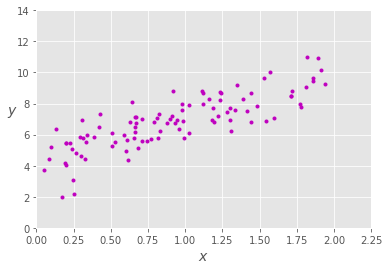

In [6]:
plt.plot(X,y,'m.')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
_ =plt.axis([0,2.25,0,14])

#### Gradient Descent

We calculate the cost and then generate a cost history over multiple iterations. The aim is to minimise the cost, and look for a flattened "Cost history vs Number of iterations" curve, so as to optimise the number of iterations too. We then set an appropriate learning rate
$\alpha$. Finding the best suited $\alpha$ is the next task, so that the best fit to the linear regression model is found.

In [7]:
def  findCost(theta,X,y):
    ''' 
    Calculates the cost for given X and Y. 
    theta = Vector of thetas. 
    X     = Row of X's (2xj vector)
    y     = Actual outputs (2x1 vector)
    [j= number of features]
    '''
    
    m = len(y)
    
    prediction = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(prediction-y))
    return cost

In [8]:
def gradientDescent(X,y,theta,lr=0.01,iterations=100):
   
    #Returns the final theta vector and the cost history over no of iterations (as an array).
    
    m = len(y)
    costHistory = np.zeros(iterations)
    thetaHistory = np.zeros((iterations,2))
    for i in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*lr*( X.T.dot((prediction - y)))
        thetaHistory[i,:] =theta.T
        costHistory[i]  = findCost(theta,X,y)
        
    return theta, costHistory, thetaHistory

Taking a random value for $\alpha$ and the number of iterations for the first descent.

In [17]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,costHistory,thetaHistory = gradientDescent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost (MSE):  {:0.3f}'.format(costHistory[-1]))

Theta0:          4.213
Theta1:          2.850
Final cost (MSE):  4861.906


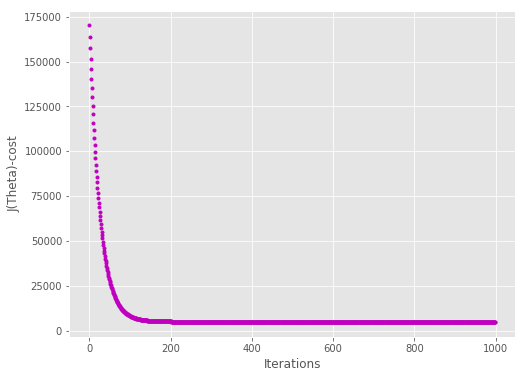

In [36]:
fig,ax = plt.subplots(figsize=(8,6))

ax.set_ylabel('J(Theta)-cost')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),costHistory,'m.')

The curve flattens out after  approximately 200 iterations, which means there isn't a large decrease in the MSE and the later iterations are quite unrequired. So, we now test for just 250 iterations-

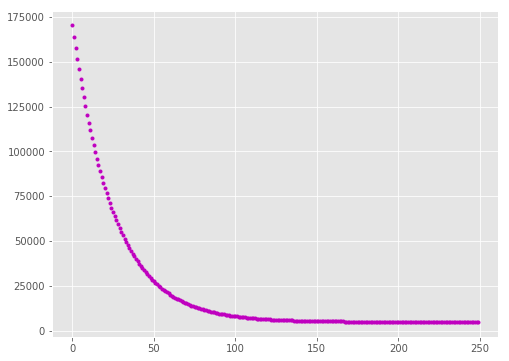

In [37]:
fig,ax = plt.subplots(figsize=(8,6))
_=ax.plot(range(250),costHistory[:250],'m.')

Looking graphically at how GD actually works:

In [25]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Graph for Gradient Descent
     ax1 = Graph for costHistory vs Iterations plot

     """
     _ = ax.plot(X,y,'m.')
     theta = np.random.randn(2,1)

     tr =0.1
     costHistory = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradientDescent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        costHistory[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'g-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),costHistory,'m.')  

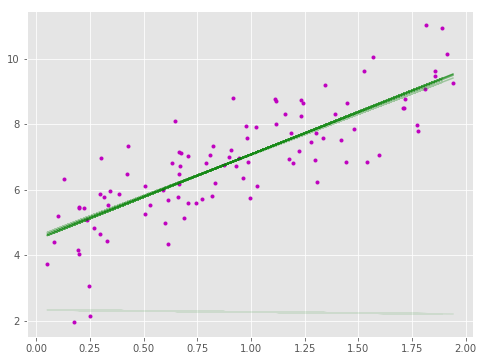

In [38]:
_,ax = plt.subplots(figsize=(8,6))
plot_GD(100,0.1,ax)

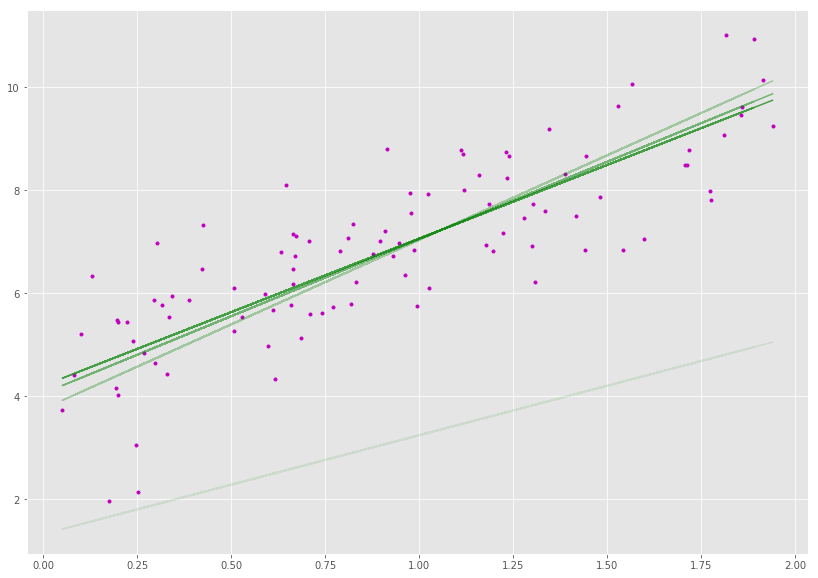

In [27]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.2,ax)

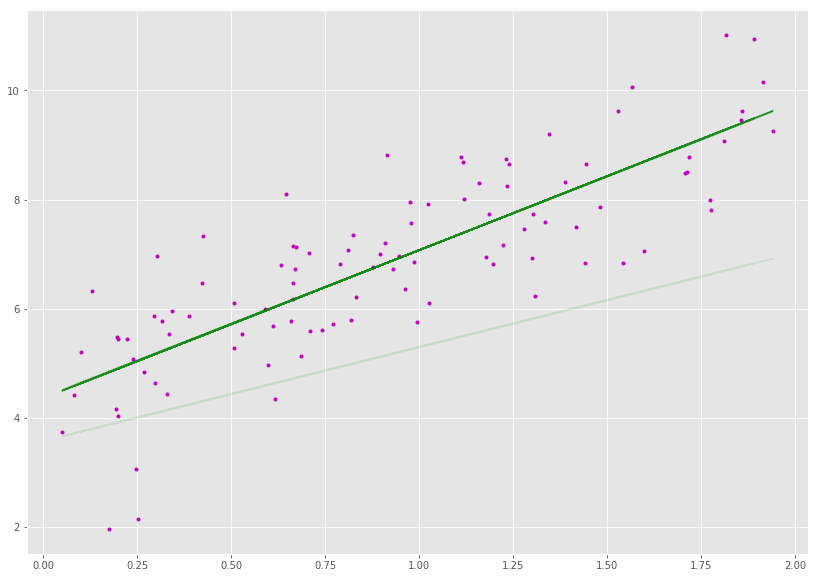

In [34]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.4,ax)

The learning rate 0.4 seems as the best fit because an overlapping single linear curve is obtained.

### Question 3

Go through first 2 chapters of ISLR. Now, explain Bias-Variance tradeoff in detail.

